In [27]:
# import the necessary packages
from imutils.video import VideoStream
# import argparse
import imutils
import time
import cv2
import os

# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-c", "--cascade", required=True,
# 	help = "path to where the face cascade resides")
# ap.add_argument("-o", "--output", required=True,
# 	help="path to output directory")
# args = vars(ap.parse_args())

# load OpenCV's Haar cascade for face detection from disk
detector = cv2.CascadeClassifier("C:/Users/DANIELDANI/AppData/Local/Programs/Python/Python37-32/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")

# initialize the video stream, allow the camera sensor to warm up,
# and initialize the total number of example faces written to disk
# thus far
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
# vs = VideoStream(usePiCamera=True).start()
time.sleep(2.0)
total = 0

# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream, clone it, (just
	# in case we want to write it to disk), and then resize the frame
	# so we can apply face detection faster
	frame = vs.read()
	orig = frame.copy()
	frame = imutils.resize(frame, width=400)

	# detect faces in the grayscale frame
	rects = detector.detectMultiScale(
		cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), scaleFactor=1.1, 
		minNeighbors=5, minSize=(30, 30))

	# loop over the face detections and draw them on the frame
	for (x, y, w, h) in rects:
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
 
	# if the `k` key was pressed, write the *original* frame to disk
	# so we can later process it and use it for face recognition
	if key == ord("k"):
		p = os.path.sep.join(['dataset/vinodh/', "{}.png".format(
			str(total).zfill(5))])
		cv2.imwrite(p, orig)
		total += 1

	# if the `q` key was pressed, break from the loop
	elif key == ord("q"):
		break
        
# print the total faces saved and do a bit of cleanup
print("[INFO] {} face images stored".format(total))
print("[INFO] cleaning up...")
cv2.destroyAllWindows()
vs.stop()

[INFO] starting video stream...
[INFO] 0 face images stored
[INFO] cleaning up...


In [38]:
# import the necessary packages
from imutils import paths
import numpy as np
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import re
import pandas as pd

In [39]:
detector = cv2.dnn.readNetFromCaffe('face_detection_model/deploy.prototxt' ,'face_detection_model/res10_300x300_ssd_iter_140000.caffemodel')
embedder = cv2.dnn.readNetFromTorch('openface_nn4.small2.v1.t7')

In [40]:
image_paths = list(paths.list_images('dataset/'))

In [41]:
known_embeddings = []
known_names = []

total = 0

In [42]:
# test = image_paths[0]
# test
# imdum = cv2.imread(test)
# imdum = imutils.resize(imdum, width=600) 
# (dum, dumil) = imdum.shape[:2]
# imageBlobdum = cv2.dnn.blobFromImage(cv2.resize(imdum, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB=False, crop=False)

[INFO] processing image 1/129
dani
[INFO] processing image 2/129
dani
[INFO] processing image 3/129
dani
[INFO] processing image 4/129
dani
[INFO] processing image 5/129
dani
[INFO] processing image 6/129
dani
[INFO] processing image 7/129
dani
[INFO] processing image 8/129
dani
[INFO] processing image 9/129
dani
[INFO] processing image 10/129
dani
[INFO] processing image 11/129
dani
[INFO] processing image 12/129
dani
[INFO] processing image 13/129
dani
[INFO] processing image 14/129
dani
[INFO] processing image 15/129
dani
[INFO] processing image 16/129
dani
[INFO] processing image 17/129
dani
[INFO] processing image 18/129
dani
[INFO] processing image 19/129
dani
[INFO] processing image 20/129
dani
[INFO] processing image 21/129
dani
[INFO] processing image 22/129
dani
[INFO] processing image 23/129
dani
[INFO] processing image 24/129
dani
[INFO] processing image 25/129
dani
[INFO] processing image 26/129
dani
[INFO] processing image 27/129
dani
[INFO] processing image 28/129
dani
[

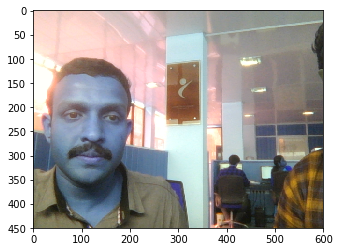

In [43]:
# loop over the image paths
for (i, image_path) in enumerate(image_paths):
    # extract the person name from the image path
    print("[INFO] processing image {}/{}".format(i + 1, len(image_paths)))
    name = image_path.split(os.path.sep)[-2]
    name = re.split("[/]", name)[-1]
    print(name)
    
    # load the image, resize it to have a width of 600 pixels (while
    # maintaining the aspect ratio), and then grab the image
    # dimensions
    
    image = cv2.imread(image_path)
    image = imutils.resize(image, width=600)
    # height and width of image
    (h, w) = image.shape[:2]
    plt.imshow(image)
    
    # construct a blob from the image
    imageBlob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB=False, crop=False)

    # apply OpenCV's deep learning-based face detector to localize
    # faces in the input image
    detector.setInput(imageBlob)
    detections = detector.forward()
    
    # ensure at least one face was found
    if len(detections) > 0:
        # we're making the assumption that each image has only ONE
        # face, so find the bounding box with the largest probability
        i = np.argmax(detections[0, 0, :, 2])
        confidence = detections[0, 0, i, 2]

        # ensure that the detection with the largest probability also
        # means our minimum probability test (thus helping filter out
        # weak detections)
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for
            # the face
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # extract the face ROI and grab the ROI dimensions
            face = image[startY:endY, startX:endX]
            (fH, fW) = face.shape[:2]

            # ensure the face width and height are sufficiently large
            if fW < 20 or fH < 20:
                continue
            # construct a blob for the face ROI, then pass the blob
            # through our face embedding model to obtain the 128-d
            # quantification of the face
            faceBlob = cv2.dnn.blobFromImage(face, 1.0 / 255, (96, 96), (0, 0, 0), swapRB=True, crop=False)
            embedder.setInput(faceBlob)
            vec = embedder.forward()

            # add the name of the person + corresponding face
            # embedding to their respective lists
            known_names.append(name)
            known_embeddings.append(vec.flatten())
            total += 1
            
# dump the facial embeddings + names to disk
print("[INFO] serializing {} encodings...".format(total))
data = {"embeddings": known_embeddings, "names": known_names}
f = open('output/embeddings.pickle', "wb")
f.write(pickle.dumps(data))
f.close()

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pickle

In [45]:
# load the face embeddings
print("[INFO] loading face embeddings...")
data = pickle.loads(open('output/embeddings.pickle', "rb").read())

# encode the labels
print("[INFO] encoding labels...")
le = LabelEncoder()
labels = le.fit_transform(data["names"])

[INFO] loading face embeddings...
[INFO] encoding labels...


In [46]:
data['embeddings'][1].shape

(128,)

In [48]:
emb = data['embeddings']

In [49]:
nam = data['names']

In [50]:
nam[0]

'dani'

In [51]:
len(emb)

128

In [52]:
len(nam)

128

In [53]:
print(nam)

['dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'dani', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'vinodh', 'vinodh', 'vi

In [54]:
le = LabelEncoder()
labels = le.fit_transform(data["names"])

In [55]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [22]:
list_model = [LogisticRegression(), RandomForestClassifier(n_estimators=100), RandomForestClassifier(n_estimators=500),
              SVC(C=1.0, kernel="linear", probability=True), DecisionTreeClassifier(),
              BernoulliNB(binarize=True), BernoulliNB(binarize=0.1), GaussianNB(), RandomForestClassifier(n_estimators=50)]

In [23]:
print_model = ['LogisticRegression()', 'RandomForestClassifier(n_estimators=100)', 'RandomForestClassifier(n_estimators=500)',
              'SVC(tuned)', 'DecisionTreeClassifier()',
              'BernoulliNB(binarize=True)', 'BernoulliNB(binarize=0.1)', 'GaussianNB()', 'RandomForestClassifier(n_estimators=50)']

In [24]:
list_result = []
j = 0
for i in list_model:
    sc = cross_val_score(i, emb, labels, cv=5).mean()
    list_result.append({print_model[j]:f"score obtained ==> {sc}"})
    j+=1
print("FINISHED TRAINING")

E:\c\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\c\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\c\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\c\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\c\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


FINISHED TRAINING


In [25]:
sc

0.8680940170940172

In [26]:
list_result

[{'LogisticRegression()': 'score obtained ==> 0.8357834757834757'},
 {'RandomForestClassifier(n_estimators=100)': 'score obtained ==> 0.8526866096866097'},
 {'RandomForestClassifier(n_estimators=500)': 'score obtained ==> 0.8675014245014244'},
 {'SVC(tuned)': 'score obtained ==> 0.8742905982905983'},
 {'DecisionTreeClassifier()': 'score obtained ==> 0.7492735042735043'},
 {'BernoulliNB(binarize=True)': 'score obtained ==> 0.4377863247863248'},
 {'BernoulliNB(binarize=0.1)': 'score obtained ==> 0.8055612535612535'},
 {'GaussianNB()': 'score obtained ==> 0.8218461538461538'},
 {'RandomForestClassifier(n_estimators=50)': 'score obtained ==> 0.8680940170940172'}]

### WE CHOOSE SVC (94.18%)

In [27]:
recognizer = SVC(C=1.0, kernel="linear", probability=True)
recognizer.fit(data["embeddings"], labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
# write the actual face recognition model to disk
f = open('output/recognizer.pickle', "wb")
f.write(pickle.dumps(recognizer))
f.close()

# write the label encoder to disk
f = open("output/le.pickle", "wb")
f.write(pickle.dumps(le))
f.close()

In [29]:
# import the necessary packages
from imutils.video import VideoStream
from imutils.video import FPS
import numpy as np
import imutils
import pickle
import time
import cv2
import os

In [30]:
# load our serialized face detector from disk
print("[INFO] loading face detector...")
protoPath = os.path.sep.join(['face_detection_model', "deploy.prototxt"])
modelPath = os.path.sep.join(['face_detection_model', "res10_300x300_ssd_iter_140000.caffemodel"])
detector = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

# load our serialized face embedding model from disk
print("[INFO] loading face recognizer...")
embedder = cv2.dnn.readNetFromTorch('openface_nn4.small2.v1.t7')

# load the actual face recognition model along with the label encoder
recognizer = pickle.loads(open('output/recognizer.pickle', "rb").read())
le = pickle.loads(open('output/le.pickle', "rb").read())

[INFO] loading face detector...
[INFO] loading face recognizer...


In [31]:
# initialize the video stream, then allow the camera sensor to warm up
print("[INFO] starting video stream...")
# vs = VideoStream(src=0).start()
vs = cv2.VideoCapture(0)
time.sleep(4.0)

# start the FPS throughput estimator
fps = FPS().start()

# loop over frames from the video file stream
while True:
    # grab the frame from the threaded video stream
    ret, frame = vs.read()

    # resize the frame to have a width of 600 pixels (while
    # maintaining the aspect ratio), and then grab the image
    # dimensions
    frame = imutils.resize(frame, width=600)
    (h, w) = frame.shape[:2]

    # construct a blob from the image
    imageBlob = cv2.dnn.blobFromImage(
        cv2.resize(frame, (300, 300)), 1.0, (300, 300),
        (104.0, 177.0, 123.0), swapRB=False, crop=False)

    # apply OpenCV's deep learning-based face detector to localize
    # faces in the input image
    detector.setInput(imageBlob)
    detections = detector.forward()
    
        # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with
        # the prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections
        if confidence > 0.6:
            # compute the (x, y)-coordinates of the bounding box for
            # the face
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # extract the face ROI
            face = frame[startY:endY, startX:endX]
            (fH, fW) = face.shape[:2]

            # ensure the face width and height are sufficiently large
            if fW < 20 or fH < 20:
                continue
            
            # construct a blob for the face ROI, then pass the blob
            # through our face embedding model to obtain the 128-d
            # quantification of the face
            faceBlob = cv2.dnn.blobFromImage(face, 1.0 / 255, (96, 96), (0, 0, 0), swapRB=True, crop=False)
            embedder.setInput(faceBlob)
            vec = embedder.forward()

            # perform classification to recognize the face
            preds = recognizer.predict_proba(vec)[0]
            j = np.argmax(preds)
            proba = preds[j]
            name = le.classes_[j]

            # draw the bounding box of the face along with the
            # associated probability
            text = "{}: {:.2f}%".format(name, proba * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    # update the FPS counter
    fps.update()
    
    # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# stop the timer and display FPS information
fps.stop()
print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))

# do a bit of cleanup
cv2.destroyAllWindows()
# vs.stop()
vs.release()

[INFO] starting video stream...
[INFO] elasped time: 33.02
[INFO] approx. FPS: 16.29


In [4]:
import sklearn

In [5]:
sklearn.__version__

'0.20.3'

In [7]:
set1 = {'asa'}
set2 = ['sam', 'lad', 'asa']

In [8]:
for i in set2:
    if i in set1:
        print(i)

asa


In [1]:
import os

In [3]:
os.

Type:        module
String form: <module 'os' from 'E:\\c\\lib\\os.py'>
File:        e:\c\lib\os.py
Docstring:  
OS routines for NT or Posix depending on what system we're on.

This exports:
  - all functions from posix or nt, e.g. unlink, stat, etc.
  - os.path is either posixpath or ntpath
  - os.name is either 'posix' or 'nt'
  - os.curdir is a string representing the current directory (always '.')
  - os.pardir is a string representing the parent directory (always '..')
  - os.sep is the (or a most common) pathname separator ('/' or '\\')
  - os.extsep is the extension separator (always '.')
  - os.altsep is the alternate pathname separator (None or '/')
  - os.pathsep is the component separator used in $PATH etc
  - os.linesep is the line separator in text files ('\r' or '\n' or '\r\n')
  - os.defpath is the default search path for executables
  - os.devnull is the file path of the null device ('/dev/null', etc.)

Programs that import and use 'os' stand a better chance of being
po